# Isopentenol OIMCS Data

In [1]:
import cobra.test
from cobrapy_bigg_client import client
from cameo import phenotypic_phase_plane
from cameo.visualization.plotting.with_plotly import PlotlyPlotter
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
plotter = PlotlyPlotter()
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width',100)
pd.set_option('display.max_colwidth',None)

## Load isopentenol metabolomics data

Load isopentenol data files (I1.csv, I1_prot.csv, I2.csv, I2_prot.csv, I3.csv, I3_prot.csv, DH1.csv, and DH1_prot.csv) into Panda dataframes [1]

In [2]:
df_I1_orig = pd.read_csv('./data/I1.csv')
df_I1 = df_I1_orig.copy()
df_I1[1:13] = df_I1[1:13].replace({0:np.nan})
df_I1.round(5)

Unnamed: 0  Hour Strain  Sample    OD600  Intracellular volume / sample  glc__D_e    pyr_e  \
0          0.0   0.0     I1     1.0  1.65961                            0.0  58.76443  0.55966   
1          1.0   2.0     I1    10.0      NaN                            NaN  52.73718  0.05809   
2          2.0   4.0     I1    19.0  2.24000                            0.0  48.13932  0.04464   
3          3.0   6.0     I1    28.0      NaN                            NaN  44.76099  0.11082   
4          4.0   8.0     I1    37.0  2.69000                            0.0  40.25361  0.71934   
5          5.0  10.0     I1    46.0      NaN                            NaN  37.70332  0.87365   
6          6.0  12.0     I1    55.0  2.81600                            0.0  37.54679  0.87064   
7          7.0  16.0     I1    64.0      NaN                            NaN  34.69771  0.83464   
8          8.0  18.0     I1    73.0  2.86500                            0.0  34.52359  0.77274   
9          9.0  20.0     I1    82.0      NaN                            NaN  33.21792  0.64268   
10        10.0  24.0     I1    91.0  2.76300                            0.0  33.67412  0.58267   
11        11.0  36.0     I1   100.0  3.00000                            0.0  32.48485  0.46112   
12        12.0  48.0     I1   109.0  3.00000                            0.0  29.61345  0.44128   
13        13.0  72.0     I1   118.0  3.07000                            0.0  12.04674  0.24421   

     succ_e  lac__D_e    for_e      ac_e   ipoh_e  bis_e  lim_e  aacoa_c  hmgcoa_c  mev_R_c  \
0   0.09654   0.58171  1.40561   7.69692  0.00000    0.0    0.0      0.0   0.00000  0.00000   
1   1.98748   4.41807  5.48720  15.66065      NaN    NaN    NaN      NaN       NaN      NaN   
2   1.90567   6.74897  2.05995  18.43014  0.69187    NaN    NaN      NaN   0.00007  0.00028   
3   1.93568   9.65735  2.77460  20.05595      NaN    NaN    NaN      NaN       NaN      NaN   
4   1.99434  13.32804  2.92455  21.69742  1.27540    NaN    NaN      NaN       NaN  0.00060   
5   1.98721  14.22635  3.53389  23.41399      NaN    NaN    NaN      NaN       NaN      NaN   
6   1.93268  14.14165  3.30009  25.54888  1.33319    NaN    NaN      NaN   0.00005  0.00052   
7   1.84595  13.61445  3.44282  26.76486      NaN    NaN    NaN      NaN       NaN      NaN   
8   1.91550  13.78242  3.16611  29.09326  1.43396    NaN    NaN      NaN   0.00009  0.00067   
9   1.88136  13.33848  3.12149  30.25878      NaN    NaN    NaN      NaN       NaN      NaN   
10  1.91827  13.55695  2.78334  32.77885  1.56589    NaN    NaN      NaN   0.00010  0.00071   
11  2.06986  13.83004  3.63769  37.52290  1.63578    NaN    NaN      NaN       NaN  0.00064   
12  2.00746  13.35591  3.09935  39.29192  1.78663    NaN    NaN      NaN   0.00013  0.00065   
13  0.90642   6.79245  1.54613  20.39667  2.01447    0.0    0.0      0.0   0.00000  0.00054   

    5pmev_c   ipdp_c     ip_c  grdp_c  frdp_c    amp_c    adp_c    atp_c    nad_c   nadp_c  \
0   0.00002  0.00264  0.00000     0.0     0.0  0.00017  0.00007  0.00022  0.00048  0.00006   
1       NaN      NaN      NaN     NaN     NaN      NaN      NaN      NaN      NaN      NaN   
2   0.00094  0.01825  0.00397     NaN     NaN  0.00032  0.00019  0.00038  0.00183  0.00022   
3       NaN      NaN      NaN     NaN     NaN      NaN      NaN      NaN      NaN      NaN   
4   0.00122  0.01716  0.00330     NaN     NaN      NaN      NaN      NaN      NaN      NaN   
5       NaN      NaN      NaN     NaN     NaN      NaN      NaN      NaN      NaN      NaN   
6   0.00265  0.03273  0.00427     0.0     NaN  0.00023  0.00009  0.00016  0.00193  0.00026   
7       NaN      NaN      NaN     NaN     NaN      NaN      NaN      NaN      NaN      NaN   
8   0.00176  0.02458  0.00249     0.0     NaN  0.00015  0.00007  0.00010  0.00170  0.00018   
9       NaN      NaN      NaN     NaN     NaN      NaN      NaN      NaN      NaN      NaN   
10  0.00124  0.02102  0.00227     0.0     NaN  0.00014  0.00006  0.00007 

In [3]:
df_I2_orig = pd.read_csv('./data/I2.csv')
df_I2 = df_I2_orig.copy()
df_I2[1:13] = df_I2[1:13].replace({0:np.nan})
df_I2

Unnamed: 0  Hour Strain  Sample  OD600  Intracellular volume / sample   glc__D_e     pyr_e  \
0         14.0   0.0     I2     2.0  0.612                   3.060000e-07  59.613677  1.245745   
1         15.0   2.0     I2    11.0    NaN                            NaN  56.433781  2.044453   
2         16.0   4.0     I2    20.0  2.212                   5.530000e-07  51.119671  0.032797   
3         17.0   6.0     I2    29.0    NaN                            NaN  48.437667  0.030198   
4         18.0   8.0     I2    38.0  2.932                   7.330000e-07  42.784525  0.020162   
5         19.0  10.0     I2    47.0    NaN                            NaN  36.259936  0.016893   
6         20.0  12.0     I2    56.0  3.492                   8.730000e-07  32.481350  0.003604   
7         21.0  16.0     I2    65.0    NaN                            NaN  25.946659       NaN   
8         22.0  18.0     I2    74.0  3.643                   9.110000e-07  21.715087       NaN   
9         23.0  20.0     I2    83.0    NaN                            NaN  16.461312       NaN   
10        24.0  24.0     I2    92.0  3.838                   9.600000e-07  11.171903       NaN   
11        25.0  36.0     I2   101.0  3.365                   8.410000e-07   0.273384       NaN   
12        26.0  48.0     I2   110.0  3.365                   8.410000e-07        NaN       NaN   
13        27.0  72.0     I2   119.0  3.160                   7.900000e-07   0.000000  0.000000   

      succ_e  lac__D_e     for_e       ac_e     ipoh_e  bis_e  lim_e  aacoa_c  hmgcoa_c   mev_R_c  \
0   0.082564  0.705373  0.773191   5.373855   0.000000    0.0    0.0      0.0  0.000010  0.000013   
1   2.024634  2.506927  4.605670  11.976103        NaN    NaN    NaN      NaN       NaN       NaN   
2   2.005259  3.528675  1.714777  14.232073   0.363233    NaN    NaN      NaN  0.000101  0.001252   
3   2.018071  3.772524  2.296307  13.851107        NaN    NaN    NaN      NaN       NaN       NaN   
4   1.980227  4.364820  2.517141  12.766961   1.174668    NaN    NaN      NaN       NaN  0.002759   
5   1.997697  4.717307  3.306756  10.435737        NaN    NaN    NaN      NaN       NaN       NaN   
6   1.964883  4.833348  3.480295   6.777485   2.143296    NaN    NaN      NaN  0.000129  0.003675   
7   1.929020  4.582649  3.725722   2.751707        NaN    NaN    NaN      NaN       NaN       NaN   
8   1.966509  4.318062  3.769976   2.098068   5.501441    NaN    NaN      NaN  0.000139  0.004222   
9   1.924998  4.496592  4.133326   2.121549        NaN    NaN    NaN      NaN       NaN       NaN   
10  2.117394  4.228164  3.936172   2.490225   8.455631    NaN    NaN      NaN  0.000159  0.004183   
11  2.215056  2.971703  4.651510   3.842948  12.030623    NaN    NaN      NaN       NaN  0.004170   
12  2.185435  1.149223  5.080556   4.485096  12.965492    NaN    NaN      NaN  0.000015  0.003914   
13  1.976332  0.033739  4.552335   4.517918  13.194254    0.0    0.0      0.0  0.000000  0.004226   

     5pmev_c    ipdp_c      ip_c    grdp_c  frdp_c     amp_c     adp_c     atp_c     nad_c  \
0   0.000308  0.010088  0.000400  0.000000     0.0  0.000102  0.000041  0.000148  0.000295   
1        NaN       NaN       NaN       NaN     NaN       NaN       NaN       NaN       NaN   
2   0.000624  0.005778  0.003994  0.000002     NaN  0.000232  0.000125  0.000264  0.001210   
3        NaN       NaN       NaN       NaN     NaN       NaN       NaN       NaN       NaN   
4   0.000870  0.005364  0.006082  0.000002     NaN       NaN       NaN       NaN       NaN   
5        NaN       NaN       NaN       NaN     NaN       NaN       NaN       NaN       NaN   
6   0.001284  0.007189  0.012005  0.000005     NaN  0.000462  0.000194  0.000386  0.001871   
7        NaN       NaN       NaN       NaN     NaN       NaN       NaN       NaN       NaN   
8   0.001909  0.008474  0.010792  0.000002     NaN  0.000371  0.000194  0.000375  0.002012   
9        NaN       NaN       NaN       NaN     NaN       NaN       NaN       

In [4]:
df_I3_orig = pd.read_csv('./data/I3.csv')
df_I3 = df_I3_orig.copy()
df_I3[1:13] = df_I3[1:13].replace({0:np.nan})
df_I3

Unnamed: 0  Hour Strain  Sample    OD600  Intracellular volume / sample   glc__D_e     pyr_e  \
0         28.0   0.0     I3     3.0  1.47266                   7.360000e-07  58.827154  1.502550   
1         29.0   2.0     I3    12.0      NaN                            NaN  52.746947  0.043838   
2         30.0   4.0     I3    21.0  2.73100                   6.830000e-07  47.257271  0.042577   
3         31.0   6.0     I3    30.0      NaN                            NaN  43.559170  0.037291   
4         32.0   8.0     I3    39.0  3.43600                   8.590000e-07  39.602909  0.024434   
5         33.0  10.0     I3    48.0      NaN                            NaN  35.478186  0.030121   
6         34.0  12.0     I3    57.0  3.67600                   9.190000e-07  32.138155  0.016739   
7         35.0  16.0     I3    66.0      NaN                            NaN  26.477687  0.018618   
8         36.0  18.0     I3    75.0  3.52200                   8.810000e-07  22.166075  0.008213   
9         37.0  20.0     I3    84.0      NaN                            NaN  16.682227  0.013370   
10        38.0  24.0     I3    93.0  3.60900                   9.020000e-07  11.593084       NaN   
11        39.0  36.0     I3   102.0  3.14300                   7.860000e-07   0.582887       NaN   
12        40.0  48.0     I3   111.0  3.14300                   7.860000e-07        NaN       NaN   
13        41.0  72.0     I3   120.0  3.04100                   7.600000e-07   0.000000  0.000000   

      succ_e  lac__D_e     for_e       ac_e     ipoh_e  bis_e  lim_e  aacoa_c  hmgcoa_c   mev_R_c  \
0   0.130537  0.722448  1.756387   8.610824   0.000000    0.0    0.0      0.0  0.000000  0.000014   
1   2.032289  1.016238  3.252140  15.022065        NaN    NaN    NaN      NaN       NaN       NaN   
2   1.976713  1.271714  3.238518  18.080266   0.894530    NaN    NaN      NaN  0.000008  0.001105   
3   2.022644  0.983455  4.250315  19.266778        NaN    NaN    NaN      NaN       NaN       NaN   
4   2.067051  1.015896  4.798392  17.904580   2.692730    NaN    NaN      NaN       NaN  0.001672   
5   2.118655  1.186512  5.619965  16.277402        NaN    NaN    NaN      NaN       NaN       NaN   
6   2.100279  1.158504  5.376689  14.775171   3.907832    NaN    NaN      NaN  0.000008  0.001764   
7   2.010458  0.877759  5.777819  12.491557        NaN    NaN    NaN      NaN       NaN       NaN   
8   2.057558  0.918596  6.524962  11.269142   7.480933    NaN    NaN      NaN  0.000006  0.001820   
9   2.016352  1.168517  6.292440  10.275853        NaN    NaN    NaN      NaN       NaN       NaN   
10  2.306165  1.356594  7.771758  10.573622  10.086103    NaN    NaN      NaN  0.000008  0.002131   
11  2.349987  0.992163  8.931067   8.617885  14.304672    NaN    NaN      NaN       NaN  0.002087   
12  2.022999  0.086457  8.376450   3.448360  14.348194    NaN    NaN      NaN  0.000023  0.001986   
13  1.895503  0.066486  8.070932   0.037022  14.575206    0.0    0.0      0.0  0.000000  0.002204   

     5pmev_c    ipdp_c      ip_c    grdp_c    frdp_c     amp_c     adp_c     atp_c     nad_c  \
0   0.000308  0.000338  0.000000  0.000000  0.000000  0.000172  0.000057  0.000171  0.000053   
1        NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2   0.000624  0.011553  0.006719       NaN       NaN  0.000318  0.000140  0.000343  0.001778   
3        NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4   0.000870  0.011583  0.005611  0.000002       NaN       NaN       NaN       NaN       NaN   
5        NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
6   0.001284  0.012836  0.008258  0.000004       NaN  0.000419  0.000175  0.000406  0.002116   
7        NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
8   0.001909  0.011321  0.008002  0.000002       NaN  0.000356  0.000180  0.000390  0.002400   
9        NaN       NaN     

## Load "wild type" metabolomics data

In [5]:
df_WT_orig = pd.read_csv('./data/DH1.csv')
df_WT = df_WT_orig.copy()
df_WT[1:13] = df_WT[1:13].replace({0:np.nan})
df_WT

Unnamed: 0  Hour Strain  Sample     OD600  Intracellular volume / sample   glc__D_e     pyr_e  \
0        112.0   0.0    DH1     9.0  2.341945                   1.170000e-06  59.658526  1.467114   
1        113.0   2.0    DH1    18.0       NaN                            NaN  50.502054  2.875747   
2        114.0   4.0    DH1    27.0  3.473000                   8.680000e-07  43.903863  5.020363   
3        115.0   6.0    DH1    36.0       NaN                            NaN  41.373224  3.676298   
4        116.0   8.0    DH1    45.0  3.304000                   8.260000e-07  38.205762  1.485282   
5        117.0  10.0    DH1    54.0       NaN                            NaN  36.118672  0.301839   
6        118.0  12.0    DH1    63.0  3.220000                   8.050000e-07  35.239676  0.056854   
7        119.0  16.0    DH1    72.0       NaN                            NaN  33.759436  0.022812   
8        120.0  18.0    DH1    81.0  3.027000                   7.570000e-07  31.333426  0.010177   
9        121.0  20.0    DH1    90.0       NaN                            NaN  30.631938  0.000719   
10       122.0  24.0    DH1    99.0  3.070000                   7.680000e-07  30.258159       NaN   
11       123.0  36.0    DH1   108.0  3.080000                   7.700000e-07  26.650366       NaN   
12       124.0  48.0    DH1   117.0  3.080000                   7.700000e-07  23.555062  0.012647   
13       125.0  72.0    DH1   126.0  3.188000                   7.970000e-07  17.563388  0.035291   

      succ_e  lac__D_e     for_e       ac_e  ipoh_e  bis_e  lim_e  aacoa_c  hmgcoa_c   mev_R_c  \
0   0.088061  0.691298  2.571280   9.320117     0.0    0.0    0.0      0.0       0.0  0.000031   
1   2.057202  1.326654  3.349642  20.219484     NaN    NaN    NaN      NaN       NaN       NaN   
2   2.128309  1.807194  2.289811  25.352706     NaN    NaN    NaN      NaN       NaN  0.000025   
3   2.360378  3.175710  3.026135  29.062115     NaN    NaN    NaN      NaN       NaN       NaN   
4   2.263375  2.215952  2.816229  33.510075     NaN    NaN    NaN      NaN       NaN  0.000041   
5   2.217004  1.610402  2.664501  37.760033     NaN    NaN    NaN      NaN       NaN       NaN   
6   2.143230  0.750750  2.532370  40.841299     NaN    NaN    NaN      NaN       NaN  0.000019   
7   2.001863  0.082252  2.470302  45.388343     NaN    NaN    NaN      NaN       NaN       NaN   
8   1.858777  0.028079  2.397284  46.219817     NaN    NaN    NaN      NaN       NaN  0.000072   
9   1.883817       NaN  2.015811  49.898585     NaN    NaN    NaN      NaN       NaN       NaN   
10  1.966204       NaN  2.103619  53.718901     NaN    NaN    NaN      NaN       NaN  0.000095   
11  1.915547       NaN  1.872516  58.513739     NaN    NaN    NaN      NaN       NaN  0.000021   
12  1.904683  0.019269  1.555857  63.747044     NaN    NaN    NaN      NaN       NaN  0.000027   
13  1.857456  0.207005  1.439761  70.503913     0.0    0.0    0.0      0.0       0.0  0.000063   

    5pmev_c    ipdp_c  ip_c    grdp_c    frdp_c     amp_c     adp_c     atp_c     nad_c    nadp_c  \
0   0.00000  0.000012   0.0  0.000009  0.000009  0.000183  0.000115  0.000352  0.000722  0.000054   
1       NaN       NaN   NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2       NaN       NaN   NaN       NaN       NaN  0.000505  0.000225  0.000710  0.002879  0.000181   
3       NaN       NaN   NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4       NaN       NaN   NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
5       NaN       NaN   NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
6       NaN       NaN   NaN  0.000007  0.000007  0.000281  0.000111  0.000155  0.001325  0.000129   
7       NaN       NaN   NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
8       NaN       NaN   NaN  0.000004  0.000004  0.000346  0.000132  0.000210  0.001512  0.000126   
9      

## Load isopentenol proteomics data

In [6]:
df_I1_prot = pd.read_csv('./data/I1_prot.csv')
df_I1_prot

Unnamed: 0   ACACT1r      BISS      HMGR      HMGS     IPDDI      GRTT      LIMS      ERG1  \
0           0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1           4  8.754326 -0.043069  0.525719  4.997834  0.730393  0.130872  0.215729  1.088438   
2           8  8.643462  0.338802 -0.371774  4.881469  0.898120 -0.251947 -0.047306  0.984519   
3          12  8.838833  0.321928  0.067265  5.113034  1.606658  0.188358  1.255257  1.220360   
4          18  8.709735 -0.387023 -0.076128  4.857185  0.447459 -0.153431 -0.047306  0.919627   
5          24  8.752866  0.160465 -0.196149  4.987685  1.198780 -0.052309  0.600393  0.891170   
6          36  8.698719  0.667425 -0.370918  4.916286  1.155278 -0.177436 -1.146841  0.919627   
7          48  9.105732  1.010569  0.235855  5.368489  1.595851  0.258031  0.600393  1.293217   
8          72  8.696295  0.497500 -0.231469  5.037382  1.227069 -0.017226  0.403356  0.824512   

       NudB      MVD1      ERG8       GND      FRD2       PPC       FUM       PFK     SUCDi  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  6.745970  5.940762  1.251414  0.103991  0.400976  0.891638  0.582926  1.445863  0.585137   
2  6.652917  5.787588  1.036448 -0.129160  0.124477  0.669512  0.403207  1.140550  0.221829   
3  6.828486  6.049666  1.124018  0.031522  0.402342  0.822262  0.349915  1.417347  0.116362   
4  6.734668  5.805891  1.099702 -0.115065  0.137668  0.696629  0.480761  1.190466  0.294811   
5  6.716982  5.864665  1.150188 -0.098299  0.139308  0.693573  0.256436  1.032383  0.178074   
6  6.620296  5.887284  0.999374 -0.230516  0.134381  0.475355  0.263783  1.053869  0.196706   
7  7.155167  6.260407  1.524921  0.309594  0.452026  1.040972  0.738545  1.450643  0.519201   
8  6.720805  5.998015  1.073782 -0.171636  0.248213  0.534619  0.409417  1.125712  0.214752   

     FDH4pp    ICDHyr       PFL      ACKr       ENO       PGI       PGK       RPI    SUCOAS  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  1.155570  0.953369  0.670008 -0.530067  0.946425  1.108996  0.920882  0.524176  0.948990   
2  1.103340  0.693551  0.204117 -1.079796  0.038376  0.592176  0.513864  0.429338  0.546649   
3  0.801220  0.703580  0.090640 -0.798059  0.481705  0.756895  0.701517  0.291940  0.731868   
4  0.880947  0.495189 -0.028800 -1.185892  0.384228  0.596666  0.624047  0.056225  0.526872   
5  0.353016  0.433318  0.231892 -0.961208  0.408622  0.582248  0.539205  0.105004  0.591940   
6  0.681639  0.366931  0.236192 -1.069180  0.295558  0.518365  0.453237 -0.017977  0.550614   
7  1.439821  0.777160  0.625815 -0.547643  0.839112  0.934822  0.978562  0.169359  0.949024   
8  1.193538  0.681077  0.319820 -1.005050  0.205048  0.610053  0.474063  0.395737  0.559853   

        TPI      TALA      FRD3       FBA      GAPD       FBP      PTAr       PDH     ACALD  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  1.083671  1.559060  0.725795  0.525050  1.177144 -0.218923 -0.139790  0.156129  1.507326   
2  0.742595  1.367606  0.165496 -0.012973  0.530537 -0.768052 -0.324905 -0.392876  1.186287   
3  1.185307  1.523479  0.306747  0.104191  0.669862 -0.459973 -0.376991 -0.125328  1.471803   
4  0.837948  1.443038  0.239305  0.173108  0.556925 -0.909772 -0.652116 -0.265269  1.177571   
5  0.838976  1.436190  0.140445 -0.039826  0.767430 -0.751841 -0.539593 -0.284635  1.288408   
6  0.720439  1.396768  0.038405 -0.120952  0.755706 -0.666979 -0.584350 -0.326028  1.220068   
7  1.274181  1.909960  0.614358  0.384498  0.928132 -0.599174 -0.054402  0.109279  1.719680   
8  0.803935  1.446759  0.065863 -0.038831  0.679626 -0.882127 -0.534254 -0.231228  1.188216   

        FHL        CS   G6PDH2r       PYK     AKGDH     PDXPP      PPCK       PPS    ACONTa  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0

In [7]:
df_I2_prot = pd.read_csv('./data/I2_prot.csv')
df_I2_prot

Unnamed: 0   ACACT1r      BISS      HMGR      HMGS     IPDDI      GRTT      LIMS      ERG1  \
0           0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1           4  7.768147 -0.112110  2.920780  5.594717 -0.834576 -0.314804 -0.329308  1.295303   
2           8  7.980107  0.224317  3.274589  5.818669 -0.366428 -0.760971  0.316027  1.571157   
3          12  8.159300 -0.512648  3.291270  6.057975  0.141176 -0.866397 -0.570316  2.125746   
4          18  7.871260  0.258533  2.353761  5.883231  0.013421 -0.887382 -0.366782  2.126690   
5          24  8.167115 -0.141554  2.210954  6.135198 -0.041027 -0.727474 -0.060121  2.472488   
6          36  7.972118  0.091423  1.932581  5.986817  0.026717 -1.085322 -1.091148  2.404047   
7          48  8.257121 -0.141554  2.235960  6.381747  0.212729 -0.713353  0.339486  2.951268   
8          72  8.319519 -0.083256  2.315076  6.547250  0.247218 -0.640290 -1.444785  2.876061   

       NudB      MVD1      ERG8       GND      FRD2       PPC       FUM       PFK     SUCDi  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  5.758937  4.627795  2.157434 -0.358177 -0.427613 -0.115351 -0.019394  0.058134  0.066424   
2  6.270561  4.871711  2.482982 -0.710406 -0.643161 -0.100621 -0.219968 -0.164525 -0.322594   
3  6.655454  4.971981  2.724631 -0.703772 -0.473236  0.113139 -0.085840 -0.074626 -0.342423   
4  6.389639  4.706053  2.791275 -0.896741 -1.069833 -0.121120 -0.357330 -0.303924 -0.639181   
5  6.604014  4.788511  2.814886 -0.883068 -0.656256 -0.035358 -0.363778 -0.065176 -0.446772   
6  6.484679  4.616363  2.682631 -1.017753 -0.718992 -0.162163 -0.963968 -0.344378 -0.818390   
7  6.869928  4.989107  2.852825 -0.685599 -0.488770  0.234921 -0.214741  0.065171 -0.331167   
8  6.934061  5.051248  2.822379 -0.562363 -0.425743  0.283766 -0.083148  0.132708 -0.411389   

     FDH4pp    ICDHyr       PFL      ACKr       ENO       PGI       PGK       RPI    SUCOAS  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1 -0.352516  0.408718 -0.303776 -1.048209 -0.269777 -0.251862 -0.373889 -0.578383  0.186796   
2  0.469485  0.036929 -0.767992 -1.449307 -0.646221 -0.822730 -0.644763 -0.889052  0.020950   
3  0.498340 -0.011589 -1.064695 -1.430929 -0.532357 -0.666226 -0.600834 -0.880912 -0.003484   
4 -0.051347 -0.332009 -2.272145 -1.839892 -0.889913 -0.911039 -0.966599 -0.936564 -0.362461   
5 -0.083056 -0.074794 -2.403569 -1.766043 -0.796482 -0.787106 -0.787614 -1.307724 -0.327690   
6 -0.391687 -0.485897 -2.686246 -1.898659 -1.058208 -0.859256 -1.028934 -1.662873 -0.411283   
7  0.447459  0.102603 -2.525650 -1.493918 -1.002880 -0.533633 -0.622811 -0.986348 -0.145770   
8  0.347923  0.041817 -2.405624 -1.449307 -0.638478 -0.426982 -0.599062 -0.560793 -0.101425   

        TPI      TALA      FRD3       FBA      GAPD       FBP      PTAr       PDH     ACALD  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1 -0.215342  0.104427 -0.388514 -0.349605  0.437590 -0.892462 -0.645986 -0.616663 -0.066171   
2 -0.600044  0.040006 -0.947650 -0.701638  0.050213 -1.241624 -1.035338 -0.908815 -0.290856   
3 -0.319829  0.181843 -0.686747 -0.838581  0.115829 -1.222018 -1.366042 -0.938740 -0.133618   
4 -0.534833 -0.237849 -0.997549 -1.110629 -0.358498 -1.499636 -1.500241 -1.168503 -0.488751   
5 -0.434100 -0.057687 -1.030866 -1.034763 -0.062766 -1.483357 -1.256457 -1.160389 -0.399101   
6 -0.712240 -0.248220 -1.170057 -1.309468 -0.322654 -1.841017 -1.832319 -1.302089 -0.559297   
7 -0.387300  0.231092 -0.760317 -0.851735  0.189978 -1.510516 -1.231602 -1.055622 -0.188756   
8 -0.368584  0.262298 -0.538233 -0.768213  0.139129 -1.476474 -1.259166 -0.812341 -0.093407   

        FHL        CS   G6PDH2r       PYK     AKGDH     PDXPP      PPCK       PPS    ACONTa  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0

In [8]:
df_I3_prot = pd.read_csv('./data/I3_prot.csv')
df_I3_prot

Unnamed: 0   ACACT1r      BISS      HMGR      HMGS     IPDDI      GRTT      LIMS      ERG1  \
0           0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1           4  7.119942  0.985203 -0.875304 -2.123989  0.572251  0.130819  1.152003  0.901894   
2           8  7.039881  0.472753 -2.584963 -1.831962  0.546488  0.094637  1.199309  1.080466   
3          12  6.976644 -0.091148 -1.337035 -1.958180  0.658963 -0.227291 -0.667425  0.942963   
4          18  7.200533  0.908852 -1.584963 -1.885829  0.763300 -0.297681 -0.754888  1.262530   
5          24  7.596233  1.113211 -0.646363 -1.420706  0.941897  0.019431  0.945552  1.720014   
6          36  7.318232  0.594744 -1.040642 -2.069541  1.109624 -0.187763  0.859822  1.463616   
7          48  7.113224  0.877143 -1.136502 -2.375968  0.807355 -0.133109 -0.847997  1.349029   
8          72  7.361918  0.970253 -1.662130 -1.244484  1.135777  0.033834  0.704544  1.792051   

       NudB      MVD1      ERG8       GND      FRD2       PPC       FUM       PFK     SUCDi  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  6.302623  5.255293  0.944884 -0.101041  0.176540  0.448429 -0.011688  0.553733 -0.503881   
2  6.554966  5.493609  1.074339 -0.325988  0.156209  0.453751 -0.032214  0.550811 -0.216926   
3  6.559821  5.305093  1.127019 -0.500896 -0.118845  0.405129 -0.247663  0.303578 -0.308508   
4  7.047026  5.425515  1.360423 -0.286230 -0.012338  0.533470 -0.250511  0.699792 -0.407215   
5  7.491949  5.753512  1.714485  0.020917  0.479397  1.010357  0.458507  1.038924 -0.369418   
6  7.197064  5.565796  1.501136 -0.284709  0.342145  0.717291  0.399516  0.728331 -0.815448   
7  7.165478  5.451824  1.297779 -0.385403  0.034682  0.580104  0.396960  0.591810 -0.712218   
8  7.397389  5.868797  1.416847 -0.139001  0.720017  0.929715  0.742805  0.876068 -0.353322   

     FDH4pp    ICDHyr       PFL      ACKr       ENO       PGI       PGK       RPI    SUCOAS  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  1.007055  0.111371 -0.281961 -0.811451 -0.058002  0.089759  0.234121 -0.285359  0.137144   
2  0.575502  0.149681 -0.755909 -1.233684 -0.246053  0.212227  0.128556 -0.005996  0.092334   
3  0.753839 -0.139475 -1.544641 -1.330645 -0.427430 -0.020402 -0.121659 -0.132271 -0.080204   
4  0.565979  0.086090 -1.885030 -1.312755 -0.212576  0.087037  0.214804 -0.108208 -0.055508   
5 -0.246161  0.532076 -1.804834 -0.612315  0.018522  0.717150  0.479376  0.143678  0.321350   
6  1.028014  0.186256 -2.318084 -1.083124 -0.185410  0.180657  0.306120 -0.086101  0.089075   
7  0.173065 -0.168521 -2.387556 -1.023710 -0.408705  0.101945  0.064704 -0.564742 -0.072624   
8  1.222392  0.254408 -2.177946 -0.849634 -0.176717  0.442627  0.287123 -0.385741  0.286192   

        TPI      TALA      FRD3       FBA      GAPD       FBP      PTAr       PDH     ACALD  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.605601  1.089952 -0.214480  0.183521  0.373195 -0.405531 -0.317700 -0.342287  0.315791   
2  0.667788  1.103528 -0.437523  0.170168  0.261074 -0.714569 -0.538403 -0.688182  0.301094   
3  0.459877  0.934039 -0.333837 -0.100943 -0.007942 -0.963331 -0.800414 -0.861429 -0.086921   
4  0.700494  1.092124 -0.332599  0.113267  0.298736 -0.835666 -0.640788 -0.616166 -0.022124   
5  1.061386  1.487127  0.048885  0.378407  0.476071 -0.601514 -0.201724 -0.235201  0.303671   
6  0.787500  1.061479 -0.372874  0.060322  0.253307 -0.667374 -0.416443 -0.456145 -0.030361   
7  0.606982  0.992236 -0.242645 -0.105720  0.071111 -0.877624 -0.743651 -0.576654 -0.161859   
8  0.792767  1.201774  0.013738  0.125780  0.320752 -0.507460 -0.391104 -0.313525  0.307178   

        FHL        CS   G6PDH2r       PYK     AKGDH     PDXPP      PPCK       PPS    ACONTa  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0

## Load "wild type" proteomics data

In [9]:
df_WT_prot = pd.read_csv('./data/DH1_prot.csv')
df_WT_prot

Unnamed: 0   ACACT1r      BISS      HMGR      HMGS     IPDDI      GRTT      LIMS      ERG1  \
0           0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1           4 -0.770518 -0.432959  0.571666  1.536667 -1.496512 -0.249778 -2.133203 -1.919382   
2           8 -0.050626 -0.082462 -0.358793  1.408343 -1.755488 -0.056584 -2.325848 -2.799087   
3          12 -0.903785 -0.362570  0.615520  1.590887 -1.796593  0.384192 -2.655156 -1.610053   
4          18 -1.067904  0.078003 -0.935294  1.183712 -2.061296  0.389849 -2.705342 -2.195016   
5          24 -0.313660  0.752907 -0.702095  1.230006 -1.684327  0.110346 -3.017726 -2.584963   
6          36 -1.214125  0.175850  0.959736  0.849975 -2.231221  0.392670 -2.910811 -1.661584   
7          48 -0.584963  0.245112 -0.081684  1.119582 -1.813369  0.216037 -2.230900 -2.488747   
8          72  0.048910  0.688056 -0.081684  1.353637 -2.041397  0.075664 -3.940558 -1.420576   

       NudB      MVD1      ERG8       GND      FRD2       PPC       FUM       PFK     SUCDi  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1 -0.952694 -1.035624 -1.820040 -0.085651 -0.121306  0.906182 -0.608314  1.073196 -0.597489   
2  0.124328 -2.000000 -2.758421  0.205573  0.281020  1.209740 -0.301305  1.234093 -0.786474   
3  0.172061 -0.898120 -2.928974 -0.144813  0.079751  1.135280 -0.273140  1.099050 -0.636646   
4 -1.383329 -0.898120 -5.713874  0.036229  0.070284  1.016373 -0.594946  1.168862 -0.909269   
5  0.093109 -1.426815 -3.480384 -0.014750  0.145339  1.116294 -0.355821  1.163507 -1.773944   
6 -1.130787 -0.589368 -4.548288  0.110496  0.046877  1.180041 -0.265899  1.131947 -0.663827   
7 -0.674230 -0.802963 -3.215968  0.139651  0.143334  1.174404 -0.434392  1.371442 -0.660151   
8 -0.853779 -1.313158 -3.257992 -0.030009  0.068172  0.998937 -0.613088  1.082365 -3.178414   

     FDH4pp    ICDHyr       PFL      ACKr       ENO       PGI       PGK       RPI    SUCOAS  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  2.134048 -0.202024 -0.768479 -1.063144  0.428167  0.613366  0.373964  0.455590 -0.301193   
2  2.250323 -0.003908 -0.316610 -0.912537  0.677422  0.910194  0.589836  0.510093 -0.150972   
3  2.474539 -0.152018 -0.452434 -1.091329  0.534924  0.592704  0.448809  0.227497 -0.314229   
4  2.041169  0.060386 -0.298906 -0.945923  0.625746  0.714930  0.525111  0.277045 -0.400604   
5  2.204931  0.010887 -0.101420 -0.920416  0.616181  0.847434  0.509921  0.143254 -0.208324   
6  1.973176 -0.079977 -0.412359 -1.094892  0.624383  0.827605  0.494569  0.104614 -0.094674   
7  2.037475  0.118107  0.027199 -0.796335  0.721219  0.924667  0.592977  0.111954 -0.077235   
8  2.171611 -0.115618 -0.170140 -1.143863  0.556592  0.759268  0.489310 -0.075108 -0.380050   

        TPI      TALA      FRD3       FBA      GAPD       FBP      PTAr       PDH     ACALD  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  1.423607  1.578730  0.031924  0.313937  0.203546 -0.893298 -0.593865 -0.775152  0.360773   
2  1.731246  1.741674  0.537230  0.537620  0.401793 -0.440257 -0.397917 -0.610062  0.645809   
3  1.571712  1.721629  0.046171  0.315356  0.222187 -0.502329 -0.689074 -0.625953  0.503176   
4  1.707011  1.715913  0.094624  0.412926  0.302780 -0.679598 -0.457476 -0.562921  0.563489   
5  1.589927  1.690076  0.523535  0.362454  0.174692 -0.650945 -0.413818 -0.517750  0.554100   
6  1.567778  1.740248  0.531658  0.410352  0.127496 -0.613266 -0.345740 -0.571085  0.629763   
7  1.626523  1.799564  0.512416  0.526712  0.311867 -0.617650 -0.471536 -0.563414  0.660656   
8  1.454706  1.595611  0.184145  0.328141  0.072222 -0.700713 -0.536946 -0.815729  0.453935   

        FHL        CS   G6PDH2r       PYK     AKGDH     PDXPP      PPCK       PPS    ACONTa  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0

## Plot the isopentenol concentrations for a single metabolite

<AxesSubplot:xlabel='Hour'>

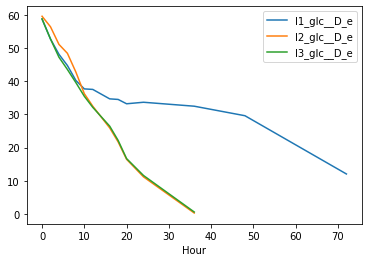

In [10]:
m_name = 'glc__D_e'
I1_m_name = 'I1_glc__D_e'
I2_m_name = 'I2_glc__D_e'
I3_m_name = 'I3_glc__D_e'
df = pd.DataFrame(df_I1['Hour'])
df1 = pd.DataFrame(df_I1[m_name])
df1.rename(columns = {m_name:I1_m_name}, inplace = True)
df[I1_m_name] = df1[I1_m_name]
df2 = pd.DataFrame(df_I2[m_name])
df2.rename(columns = {m_name:I2_m_name}, inplace = True)
df[I2_m_name] = df2[I2_m_name]
df3 = pd.DataFrame(df_I3[m_name])
df3.rename(columns = {m_name:I3_m_name}, inplace = True)
df[I3_m_name] = df3[I3_m_name]
df.plot(x='Hour')

## Plot all the isopentenol metabolite concentrations

Create a list of metabolites for all the subplots

In [11]:
m_list = list(df_I1) # Get list of dataframe column names
d_list = ['Unnamed: 0','Hour','Strain','Sample','Intracellular volume / sample','OD600','fold_production']

# Remove unwanted elements from the list
for element in d_list:
    m_list.remove(element)

print('Number of elements in m_list =',len(m_list))
m_list

Number of elements in m_list = 86


['glc__D_e',
 'pyr_e',
 'succ_e',
 'lac__D_e',
 'for_e',
 'ac_e',
 'ipoh_e',
 'bis_e',
 'lim_e',
 'aacoa_c',
 'hmgcoa_c',
 'mev_R_c',
 '5pmev_c',
 'ipdp_c',
 'ip_c',
 'grdp_c',
 'frdp_c',
 'amp_c',
 'adp_c',
 'atp_c',
 'nad_c',
 'nadp_c',
 'accoa_c',
 'fdp_c',
 '3pg_c',
 'pep_c',
 'pyr_c',
 'lac__D_c',
 'fum_c',
 'succ_c',
 'oxalcoa_c',
 'mal__L_c',
 'akg_c',
 'acon__C_c',
 'cit_c',
 'icit_c',
 'glx_c',
 'glyclt_c',
 'dxyl5p_c',
 '2me4p',
 'h2mb4p_c',
 '2mecdp_c',
 '4c2me_c',
 'gly_c',
 'ala__L_c',
 'ser__L_c',
 'pro__L_c',
 'val__L_c',
 'thr__L_c',
 'cys__L_c',
 'leu__L_c',
 'ile__L_c',
 'asn__L_c',
 'asp__L_c',
 'gln__L_c',
 'lys__L_c',
 'glu__L_c',
 'met__L_c',
 'his__L_c',
 'phe__L_c',
 'arg__L_c',
 'tyr__L_c',
 'trp__L_c',
 'Cystine',
 'ex_con.id',
 'ip_e',
 '2mecdp_e',
 'mev_R_e',
 'dxyl5p_e',
 '5pmev_e',
 'h2mb4p_e',
 'grdp_e',
 'frdp_e',
 'ggdp_e',
 '4c2me_e',
 'coa_e',
 'accoa_e',
 'aacoa_e',
 'hmgcoa_e',
 'amp_e',
 'adp_e',
 'atp_e',
 'nad_e',
 'nadh_e',
 'nadp_e',
 'nadph_e'

Plotting all the metabolite concentrations for the "I" set

Number of metabolites = 86


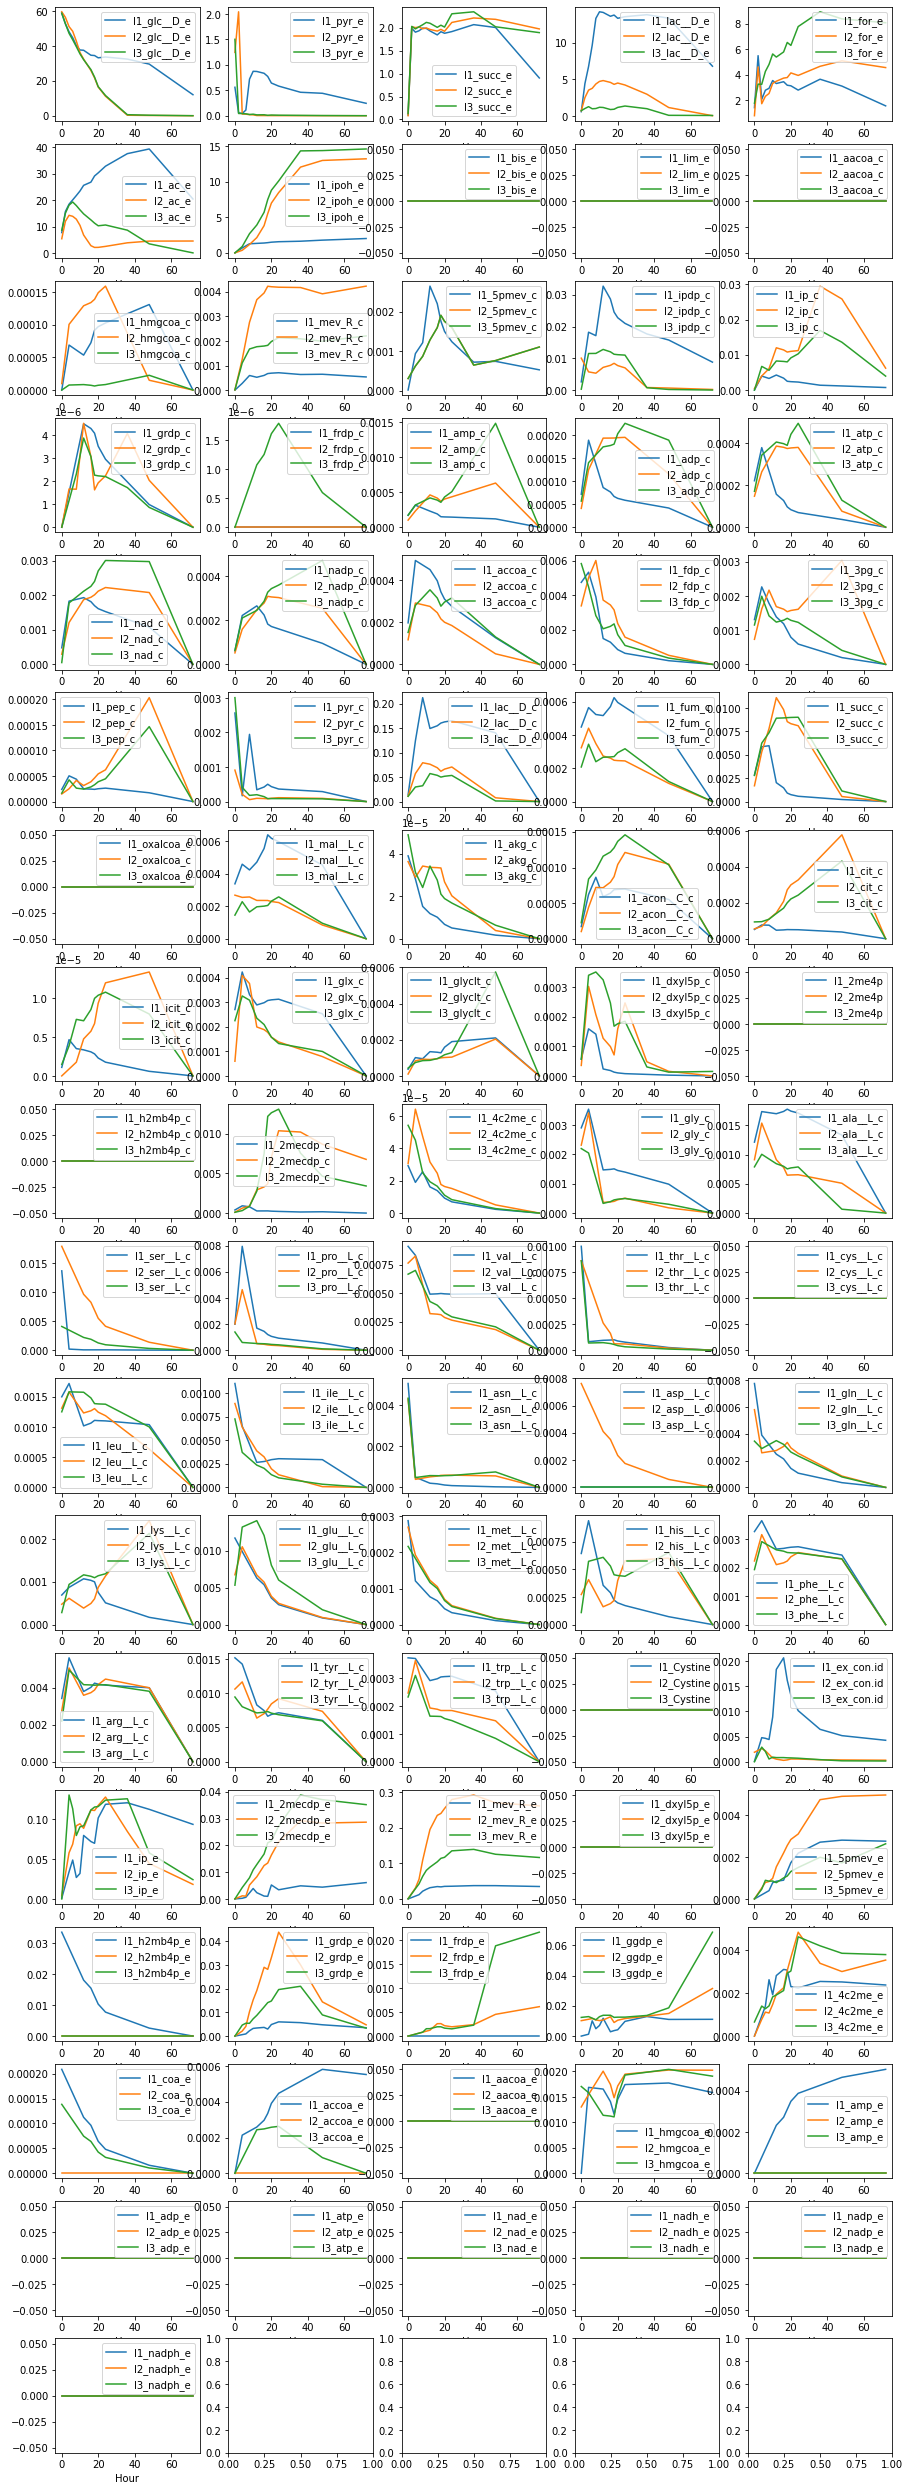

In [12]:
import matplotlib.pyplot as plt

m_list = list(df_I1) # Get list of dataframe column names
d_list = ['Unnamed: 0','Hour','Strain','Sample','Intracellular volume / sample','OD600','fold_production']

# Remove unwanted elements from the list
for element in d_list:
    m_list.remove(element)

m_length = len(m_list)
print('Number of metabolites =',m_length)

# Create a dataframe for each subplot   
dataframe_collection = {}
i=0
for met in m_list:
    df = pd.DataFrame(df_I1['Hour'])
    df1 = pd.DataFrame(df_I1[met])
    df['I1_'+met] = df1[met]
    
    df2 = pd.DataFrame(df_I2[met])
    df['I2_'+met] = df2[met]
    
    df3 = pd.DataFrame(df_I3[met])
    df['I3_'+met] = df3[met]
    dataframe_collection[i] = df
    i += 1
dataframe_collection[1] # An array of dataframes

# Plot subplots
nrow=18
ncol=5
fig, axes = plt.subplots(nrow, ncol)
count=0
for r in range(nrow): # nrow-1 since r starts with zero
    for c in range(ncol): # ncol-1 since c starts with zero
        if count == m_length:
            break
        dataframe_collection[count].interpolate(method='linear').plot(ax=axes[r,c], figsize=(15,45),x='Hour')
        count+=1

## Plot the metabolite concentrations of the isopentenol pathway

Number of metabolites = 86


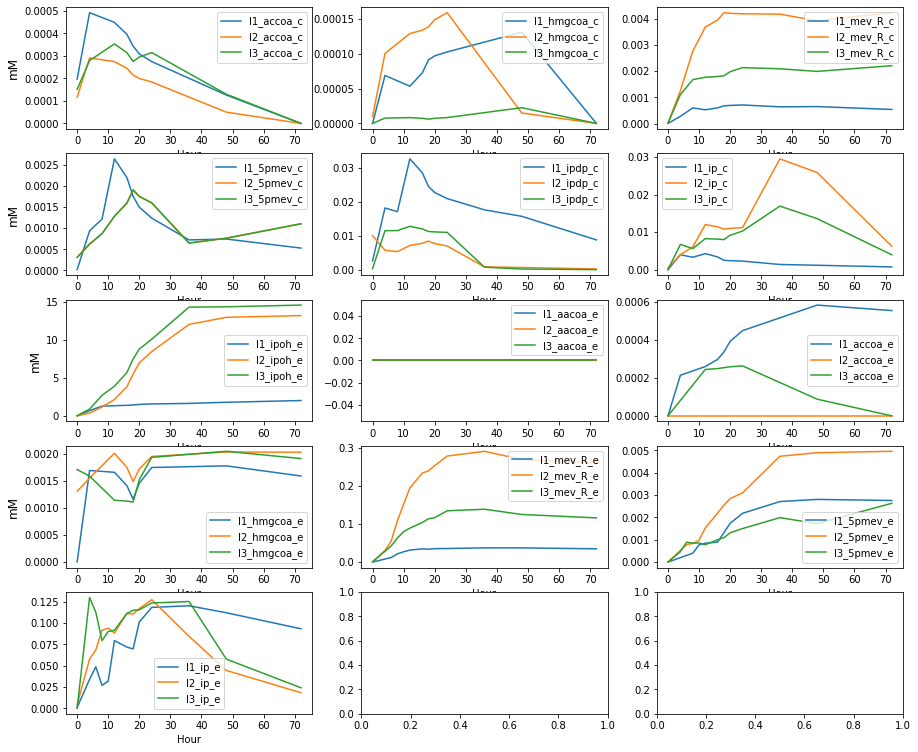

In [13]:
# Initialize data
df_I1 = df_I1_orig.copy()
df_I1[1:13] = df_I1[1:13].replace({0:np.nan})
df_I2 = df_I2_orig.copy()
df_I2[1:13] = df_I2[1:13].replace({0:np.nan})
df_I3 = df_I3_orig.copy()
df_I3[1:13] = df_I3[1:13].replace({0:np.nan})

m_list = ['accoa_c','hmgcoa_c','mev_R_c','5pmev_c','ipdp_c','ip_c','ipoh_e',
          'aacoa_e','accoa_e','hmgcoa_e','mev_R_e','5pmev_e','ip_e']
#m_list = ['aacoa_e','accoa_c','accoa_e','hmgcoa_c','hmgcoa_e','mev_R_c','mev_R_e','5pmev_c','5pmev_e','ipdp_c','ip_c','ip_e','ipoh_e']

L_list = len(m_list)

print('Number of metabolites =',m_length)

# Create a dataframe for each subplot   
dataframe_collection = {}
i=0
for met in m_list:
    df = pd.DataFrame(df_I1['Hour'])
    df1 = pd.DataFrame(df_I1[met])
    df['I1_'+met] = df1[met]
    
    df2 = pd.DataFrame(df_I2[met])
    df['I2_'+met] = df2[met]
    
    df3 = pd.DataFrame(df_I3[met])
    df['I3_'+met] = df3[met]
    
    #df4 = pd.DataFrame(df_WT[met])
    #df['WT_'+met] = df4[met]
    
    dataframe_collection[i] = df
    i += 1
dataframe_collection[1] # An array of dataframes

# Plot subplots using interpolate method
nrow=5
ncol=3
fig, axes = plt.subplots(nrow, ncol)
axes[0][0].set_ylabel('mM',size = 12)
axes[1][0].set_ylabel('mM',size = 12)
axes[2][0].set_ylabel('mM',size = 12)
axes[3][0].set_ylabel('mM',size = 12)
count=0
for r in range(nrow): # nrow-1 since r starts with zero
    for c in range(ncol): # ncol-1 since c starts with zero
        if count == L_list:
            break
        dataframe_collection[count].interpolate(method='linear').plot(ax=axes[r,c], figsize=(15,13),x='Hour')
        count+=1


## Plot the WT profile with the isopentenol metabolite concentrations

Number of metabolites = 86


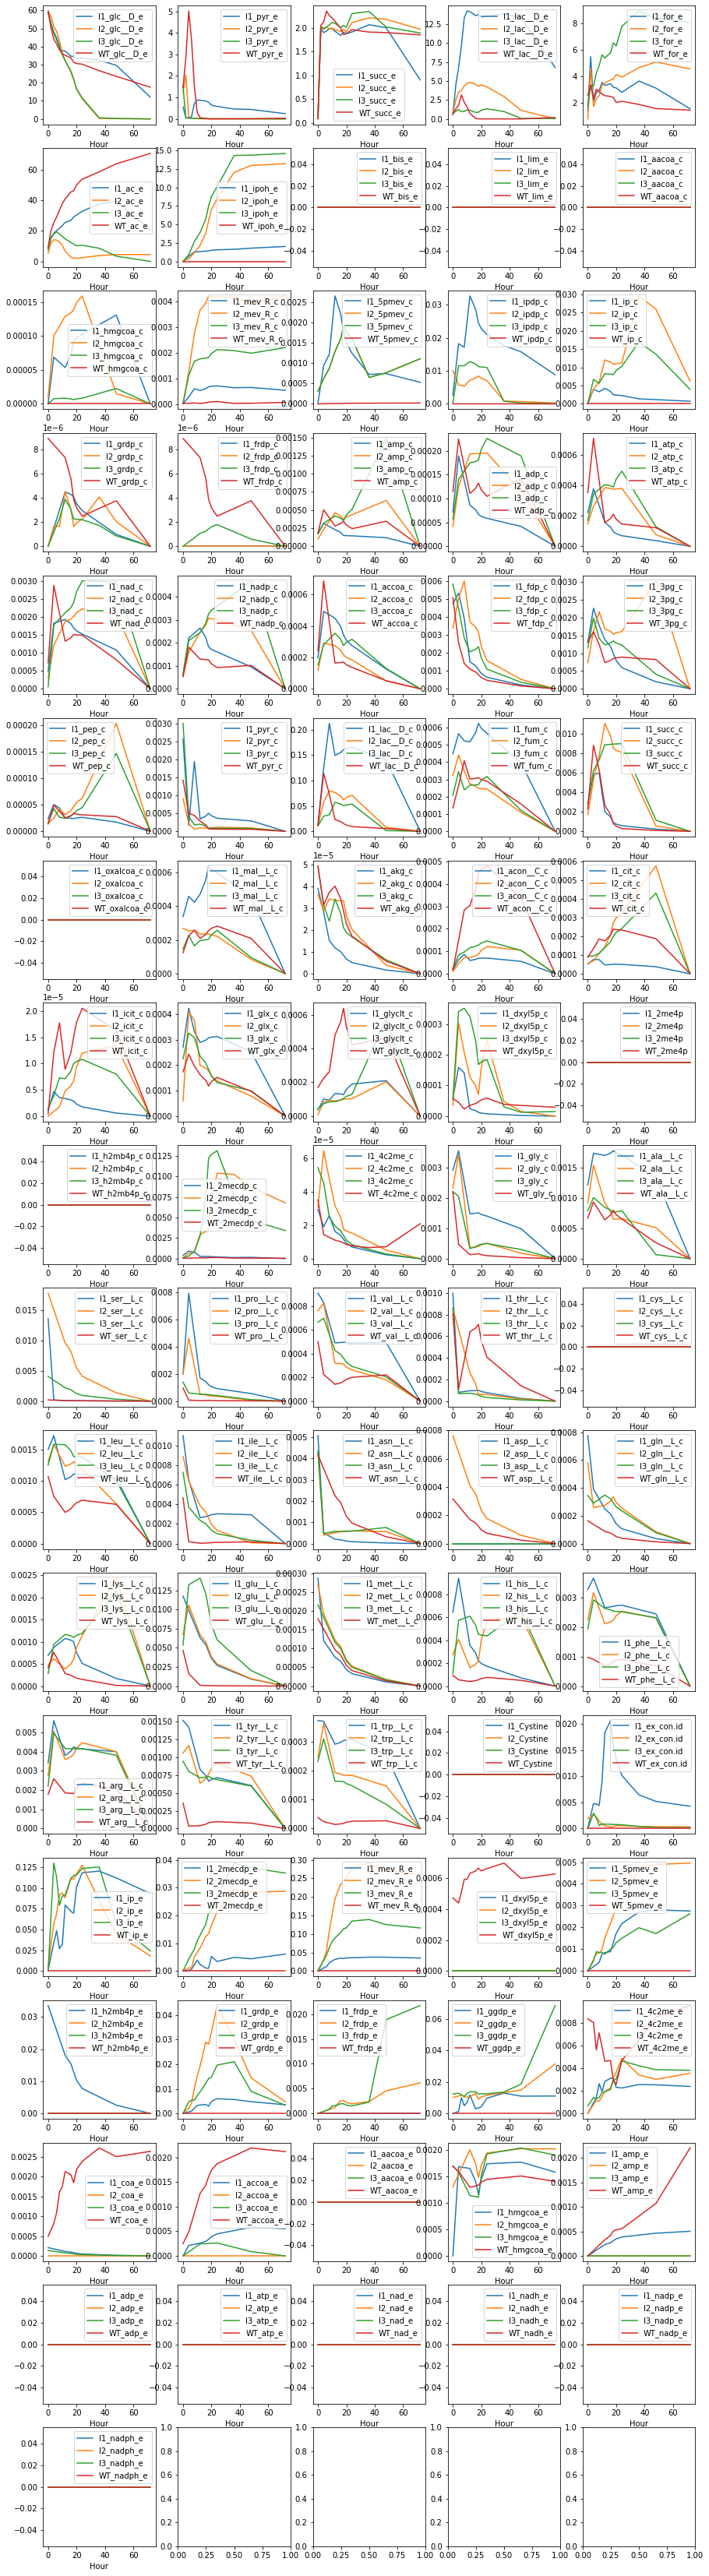

In [14]:
m_list = list(df_I1) # Get list of dataframe column names
d_list = ['Unnamed: 0','Hour','Strain','Sample','Intracellular volume / sample','OD600','fold_production']

# Remove unwanted elements from the list
for element in d_list:
    m_list.remove(element)

m_length = len(m_list)
print('Number of metabolites =',m_length)

# Create a dataframe for each subplot   
dataframe_collection = {}
i=0
for met in m_list:
    df = pd.DataFrame(df_I1['Hour'])
    df1 = pd.DataFrame(df_I1[met])
    df['I1_'+met] = df1[met]
    
    df2 = pd.DataFrame(df_I2[met])
    df['I2_'+met] = df2[met]
    
    df3 = pd.DataFrame(df_I3[met])
    df['I3_'+met] = df3[met]
    
    df4 = pd.DataFrame(df_WT[met])
    df['WT_'+met] = df4[met]
    
    dataframe_collection[i] = df
    i += 1
    
dataframe_collection[1] # An array of dataframes

# Plot subplots
nrow=18
ncol=5
fig, axes = plt.subplots(nrow, ncol)
#dataframe_collection.plot(xticks = dataframe_collection.column1)
count=0
for r in range(nrow): # nrow-1 since r starts with zero
    for c in range(ncol): # ncol-1 since c starts with zero
        if count == m_length:
            break
        dataframe_collection[count].interpolate(method='linear').plot(ax=axes[r,c], figsize=(15,60),x='Hour')
        count+=1

## Subtract optimal isopentenol metabolite concentrations from the wild type concentrations

Number of metabolites = 86


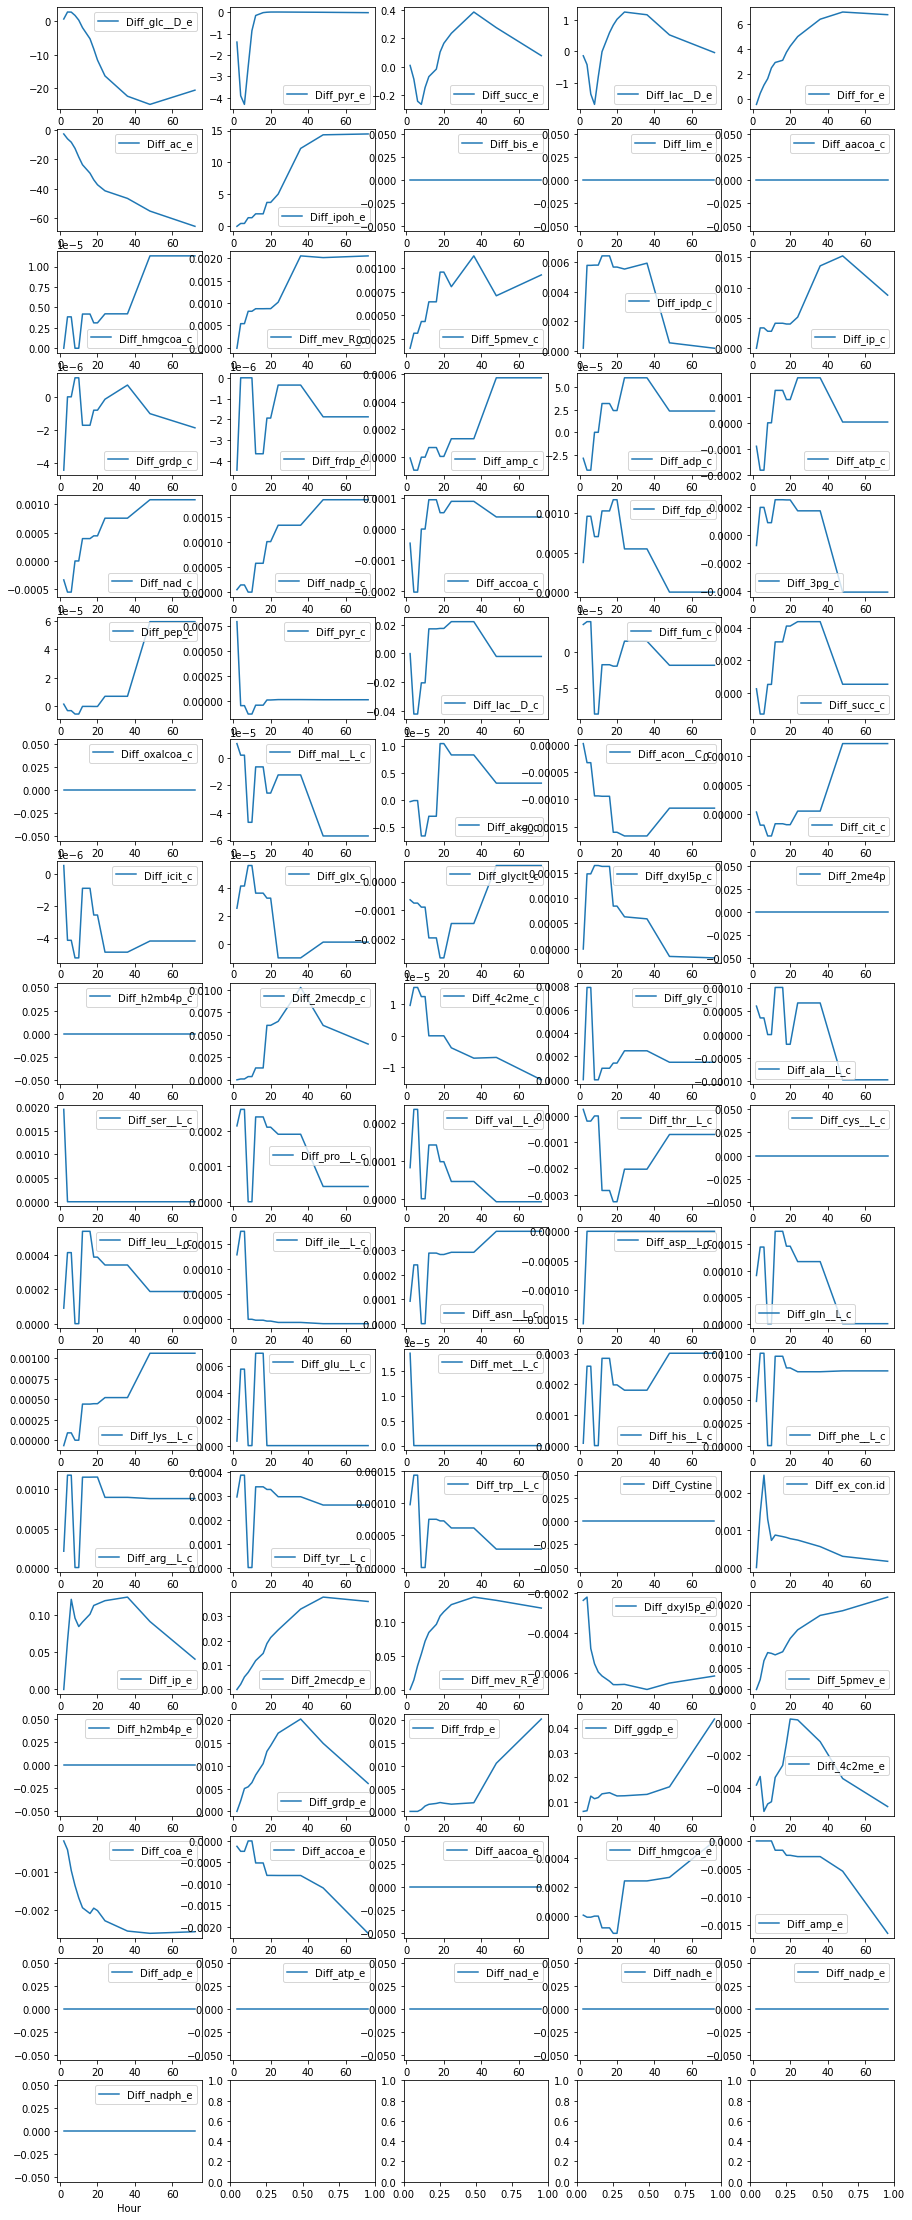

In [15]:
# Initialize data
df_I1 = df_I1_orig.copy()
df_I2 = df_I2_orig.copy()
df_I3 = df_I3_orig.copy()
df_WT = df_WT_orig.copy()

m1_list = list(df_I1) # Get list of dataframe column names
d_list = ['Unnamed: 0','Hour','Strain','Sample','Intracellular volume / sample','OD600','fold_production']

# Remove unwanted elements from the list
for element in d_list:
    m1_list.remove(element)

m1_length = len(m1_list)
print('Number of metabolites =',m1_length)
      
# Create a dataframe for each subplot    
dataframe_collection = {}
i=0
for met in m_list:
    df = pd.DataFrame(df_I1['Hour'])
    
    df3 = pd.DataFrame(df_I3[met])
    
    df4 = pd.DataFrame(df_WT[met])
    
    df5 = df3 - df4
    
    df['Diff_'+met] = df5[met].rolling(2).mean() # Smooth with moving average ".rolling(7).mean()" - changes y-axis
    dataframe_collection[i] = df
    i += 1
    
dataframe_collection[1] # An array of dataframes

# Plot subplots
nrow=18
ncol=5
fig, axes = plt.subplots(nrow, ncol)
count=0
for r in range(nrow): # nrow-1 since r starts with zero
    for c in range(ncol): # ncol-1 since c starts with zero
        if count == m1_length:
            break
        dataframe_collection[count].plot(ax=axes[r,c], figsize=(15,40),x='Hour')
        count+=1

##  Isopentenol Proteomics

### Plot the WT profile with the isopentenol metabolite concentrations

In [16]:
p_list = list(df_I1_prot)
p_length = len(p_list)
print('Number of proteins =',p_length)
p_list

Number of proteins = 56


['Unnamed: 0',
 'ACACT1r',
 'BISS',
 'HMGR',
 'HMGS',
 'IPDDI',
 'GRTT',
 'LIMS',
 'ERG1',
 'NudB',
 'MVD1',
 'ERG8',
 'GND',
 'FRD2',
 'PPC',
 'FUM',
 'PFK',
 'SUCDi',
 'FDH4pp',
 'ICDHyr',
 'PFL',
 'ACKr',
 'ENO',
 'PGI',
 'PGK',
 'RPI',
 'SUCOAS',
 'TPI',
 'TALA',
 'FRD3',
 'FBA',
 'GAPD',
 'FBP',
 'PTAr',
 'PDH',
 'ACALD',
 'FHL',
 'CS',
 'G6PDH2r',
 'PYK',
 'AKGDH',
 'PDXPP',
 'PPCK',
 'PPS',
 'ACONTa',
 'ME1',
 'TKT1',
 'ACS',
 'TKT2',
 'MDH2',
 'ACONTb',
 'PGM',
 'MDH',
 'ME2',
 'YPL069C',
 'GLYCL']

In [17]:
dfx = pd.DataFrame(df_I1_prot)
#dfx['Unnamed: 0'] = dfx['Unnamed: 0'].replace(['Unnamed: 0'],['Hours'])
#dfx.rename(columns = {'Unnamed: 0':'Hours'}, inplace = True)
dfx

Unnamed: 0   ACACT1r      BISS      HMGR      HMGS     IPDDI      GRTT      LIMS      ERG1  \
0           0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1           4  8.754326 -0.043069  0.525719  4.997834  0.730393  0.130872  0.215729  1.088438   
2           8  8.643462  0.338802 -0.371774  4.881469  0.898120 -0.251947 -0.047306  0.984519   
3          12  8.838833  0.321928  0.067265  5.113034  1.606658  0.188358  1.255257  1.220360   
4          18  8.709735 -0.387023 -0.076128  4.857185  0.447459 -0.153431 -0.047306  0.919627   
5          24  8.752866  0.160465 -0.196149  4.987685  1.198780 -0.052309  0.600393  0.891170   
6          36  8.698719  0.667425 -0.370918  4.916286  1.155278 -0.177436 -1.146841  0.919627   
7          48  9.105732  1.010569  0.235855  5.368489  1.595851  0.258031  0.600393  1.293217   
8          72  8.696295  0.497500 -0.231469  5.037382  1.227069 -0.017226  0.403356  0.824512   

       NudB      MVD1      ERG8       GND      FRD2       PPC       FUM       PFK     SUCDi  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  6.745970  5.940762  1.251414  0.103991  0.400976  0.891638  0.582926  1.445863  0.585137   
2  6.652917  5.787588  1.036448 -0.129160  0.124477  0.669512  0.403207  1.140550  0.221829   
3  6.828486  6.049666  1.124018  0.031522  0.402342  0.822262  0.349915  1.417347  0.116362   
4  6.734668  5.805891  1.099702 -0.115065  0.137668  0.696629  0.480761  1.190466  0.294811   
5  6.716982  5.864665  1.150188 -0.098299  0.139308  0.693573  0.256436  1.032383  0.178074   
6  6.620296  5.887284  0.999374 -0.230516  0.134381  0.475355  0.263783  1.053869  0.196706   
7  7.155167  6.260407  1.524921  0.309594  0.452026  1.040972  0.738545  1.450643  0.519201   
8  6.720805  5.998015  1.073782 -0.171636  0.248213  0.534619  0.409417  1.125712  0.214752   

     FDH4pp    ICDHyr       PFL      ACKr       ENO       PGI       PGK       RPI    SUCOAS  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  1.155570  0.953369  0.670008 -0.530067  0.946425  1.108996  0.920882  0.524176  0.948990   
2  1.103340  0.693551  0.204117 -1.079796  0.038376  0.592176  0.513864  0.429338  0.546649   
3  0.801220  0.703580  0.090640 -0.798059  0.481705  0.756895  0.701517  0.291940  0.731868   
4  0.880947  0.495189 -0.028800 -1.185892  0.384228  0.596666  0.624047  0.056225  0.526872   
5  0.353016  0.433318  0.231892 -0.961208  0.408622  0.582248  0.539205  0.105004  0.591940   
6  0.681639  0.366931  0.236192 -1.069180  0.295558  0.518365  0.453237 -0.017977  0.550614   
7  1.439821  0.777160  0.625815 -0.547643  0.839112  0.934822  0.978562  0.169359  0.949024   
8  1.193538  0.681077  0.319820 -1.005050  0.205048  0.610053  0.474063  0.395737  0.559853   

        TPI      TALA      FRD3       FBA      GAPD       FBP      PTAr       PDH     ACALD  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  1.083671  1.559060  0.725795  0.525050  1.177144 -0.218923 -0.139790  0.156129  1.507326   
2  0.742595  1.367606  0.165496 -0.012973  0.530537 -0.768052 -0.324905 -0.392876  1.186287   
3  1.185307  1.523479  0.306747  0.104191  0.669862 -0.459973 -0.376991 -0.125328  1.471803   
4  0.837948  1.443038  0.239305  0.173108  0.556925 -0.909772 -0.652116 -0.265269  1.177571   
5  0.838976  1.436190  0.140445 -0.039826  0.767430 -0.751841 -0.539593 -0.284635  1.288408   
6  0.720439  1.396768  0.038405 -0.120952  0.755706 -0.666979 -0.584350 -0.326028  1.220068   
7  1.274181  1.909960  0.614358  0.384498  0.928132 -0.599174 -0.054402  0.109279  1.719680   
8  0.803935  1.446759  0.065863 -0.038831  0.679626 -0.882127 -0.534254 -0.231228  1.188216   

        FHL        CS   G6PDH2r       PYK     AKGDH     PDXPP      PPCK       PPS    ACONTa  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0

In [18]:
p_list = list(df_I1_prot) # Get list of dataframe column names
p_list

['Unnamed: 0',
 'ACACT1r',
 'BISS',
 'HMGR',
 'HMGS',
 'IPDDI',
 'GRTT',
 'LIMS',
 'ERG1',
 'NudB',
 'MVD1',
 'ERG8',
 'GND',
 'FRD2',
 'PPC',
 'FUM',
 'PFK',
 'SUCDi',
 'FDH4pp',
 'ICDHyr',
 'PFL',
 'ACKr',
 'ENO',
 'PGI',
 'PGK',
 'RPI',
 'SUCOAS',
 'TPI',
 'TALA',
 'FRD3',
 'FBA',
 'GAPD',
 'FBP',
 'PTAr',
 'PDH',
 'ACALD',
 'FHL',
 'CS',
 'G6PDH2r',
 'PYK',
 'AKGDH',
 'PDXPP',
 'PPCK',
 'PPS',
 'ACONTa',
 'ME1',
 'TKT1',
 'ACS',
 'TKT2',
 'MDH2',
 'ACONTb',
 'PGM',
 'MDH',
 'ME2',
 'YPL069C',
 'GLYCL']

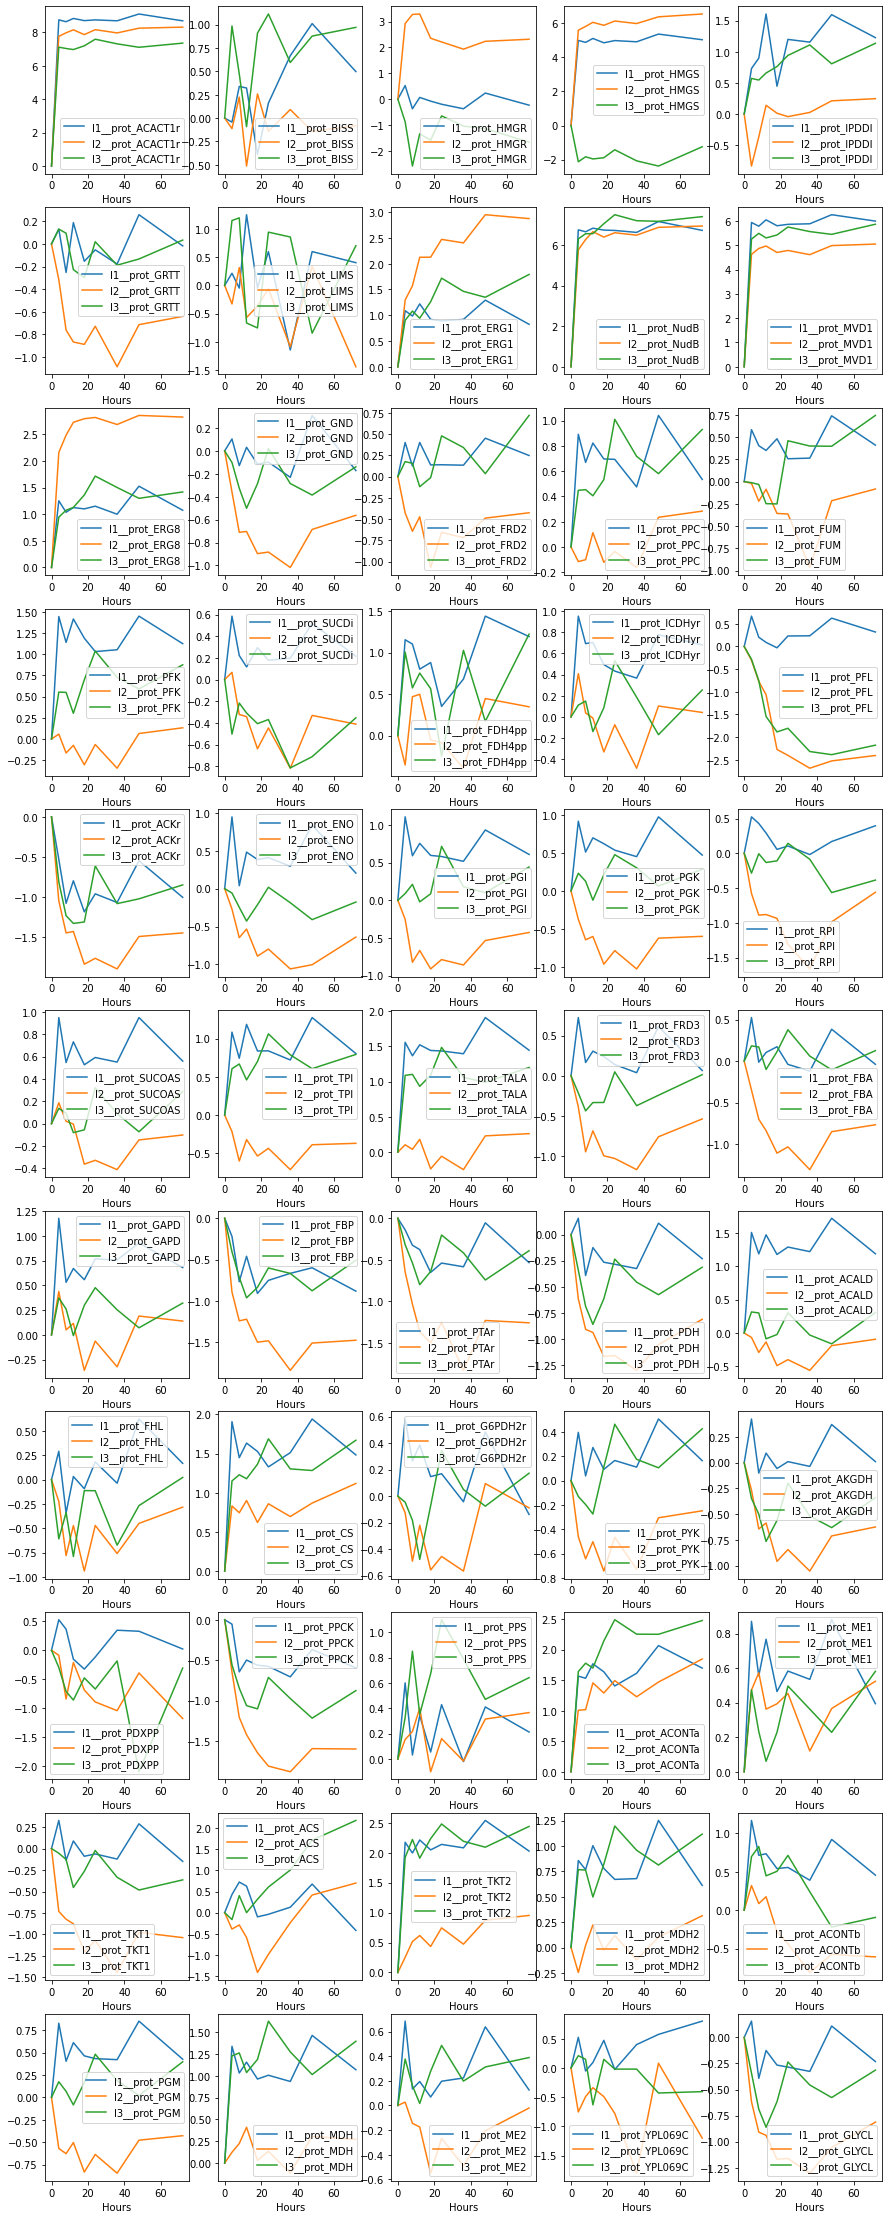

In [19]:
import numpy as np

p_list = list(df_I1_prot) # Get list of dataframe column names
d_list = ['Unnamed: 0']

# Remove unwanted elements from the list
for element in d_list:
    p_list.remove(element)

# Create a dataframe for each subplot   
dataframe_collection = {}
i=0
for met in p_list:
    df = pd.DataFrame(df_I1_prot['Unnamed: 0']).copy()
    df.rename(columns = {'Unnamed: 0':'Hours'}, inplace = True)
    
    df1 = pd.DataFrame(df_I1_prot[met])
    df['I1__prot_'+met] = df1[met]
    
    df2 = pd.DataFrame(df_I2_prot[met])
    df['I2__prot_'+met] = df2[met]
    
    df3 = pd.DataFrame(df_I3_prot[met])
    df['I3__prot_'+met] = df3[met]
    
    #df4 = pd.DataFrame(df_WT_prot[met])
    #df['WT__prot_'+met] = df4[met]
    
    dataframe_collection[i] = df
    i += 1
    
dataframe_collection[1] # An array of dataframes

# Plot subplots
nrow=11
ncol=5
fig, axes = plt.subplots(nrow, ncol)
count=0
for r in range(nrow): # nrow-1 since r starts with zero
    for c in range(ncol): # ncol-1 since c starts with zero
        if count == p_length-1:
            break
        dataframe_collection[count].interpolate(method='linear').plot(ax=axes[r,c], figsize=(15,40),x='Hours')
        count+=1

Smoothing the data

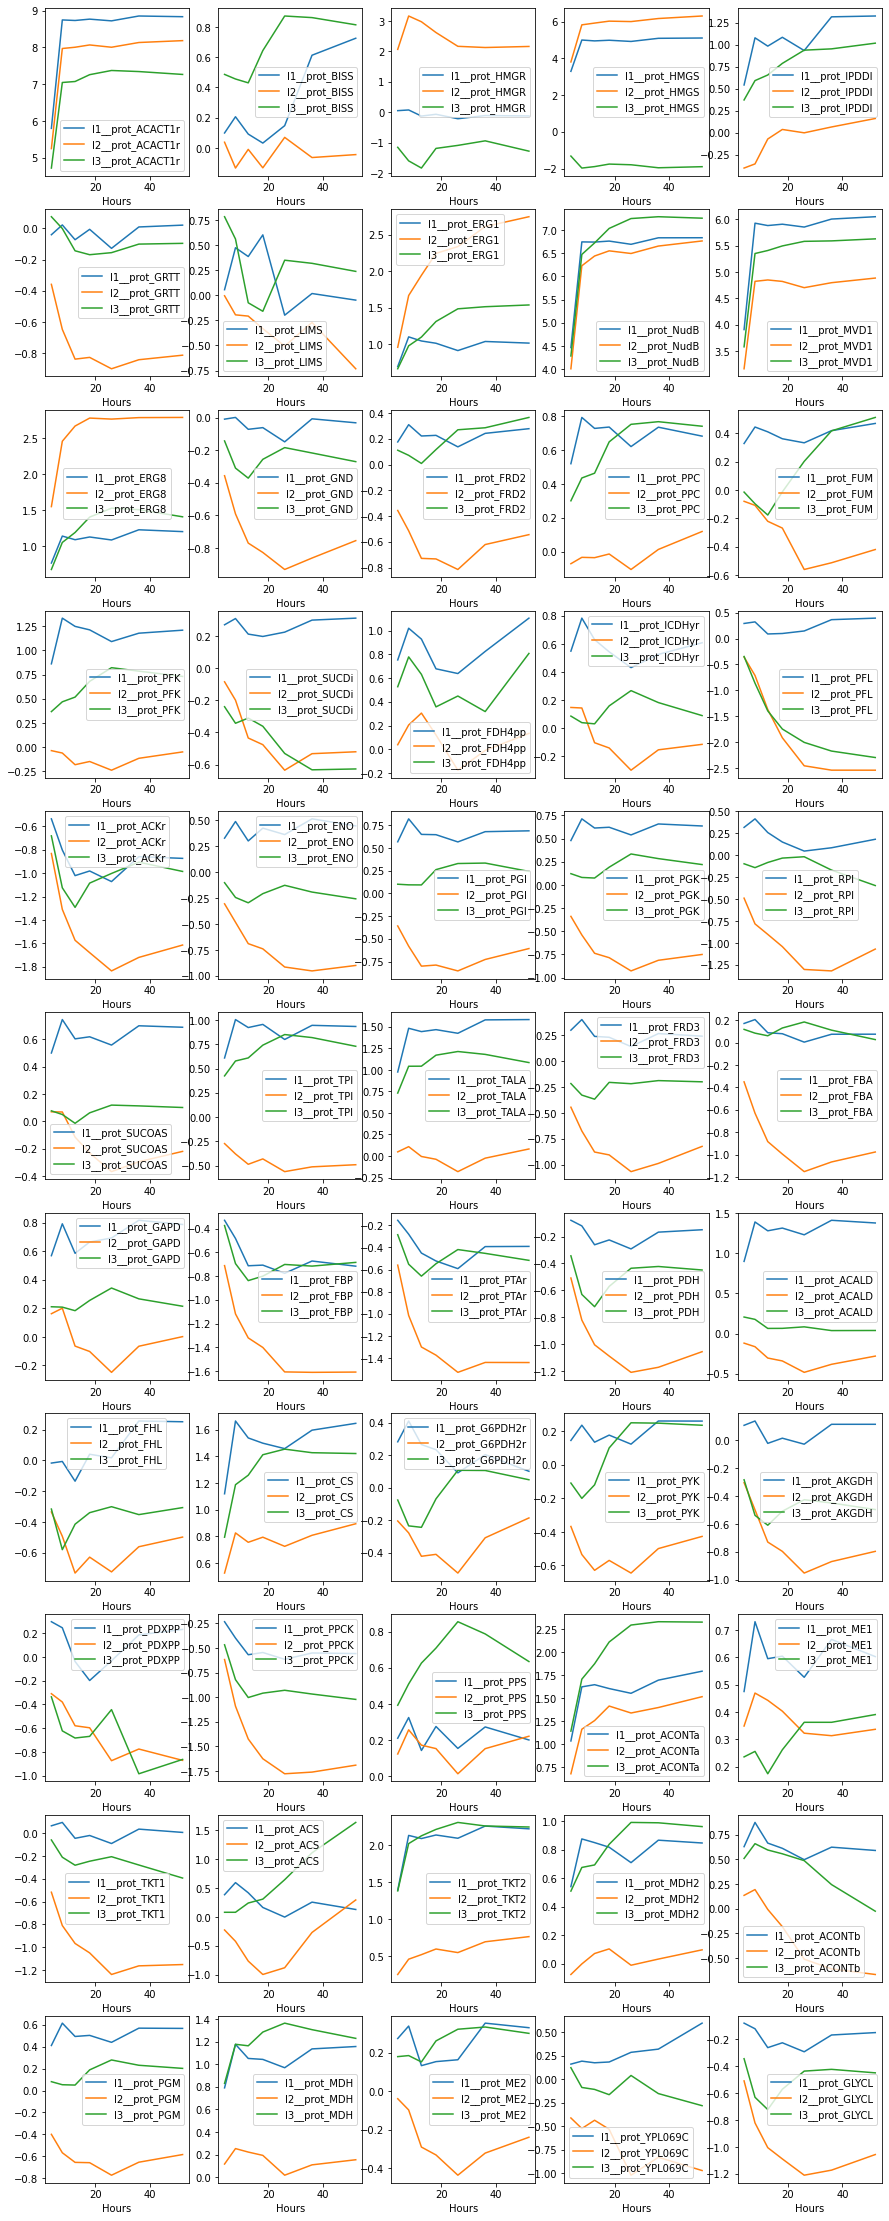

In [20]:
p_list = list(df_I1_prot) # Get list of dataframe column names
d_list = ['Unnamed: 0']

# Remove unwanted elements from the list
for element in d_list:
    p_list.remove(element)

# Create a dataframe for each subplot   
dataframe_collection = {}
i=0
for met in p_list:
    df = pd.DataFrame(df_I1_prot['Unnamed: 0']).copy()
    df.rename(columns = {'Unnamed: 0':'Hours'}, inplace = True)
    
    df1 = pd.DataFrame(df_I1_prot[met])
    #df['I1__prot_'+met] = df1[met].interpolate(method = 'linear')
    df['I1__prot_'+met] = df1[met]
    
    df2 = pd.DataFrame(df_I2_prot[met])
    df['I2__prot_'+met] = df2[met].interpolate(method = 'linear')
    
    df3 = pd.DataFrame(df_I3_prot[met])
    df['I3__prot_'+met] = df3[met].interpolate(method = 'linear')
    
    #df4 = pd.DataFrame(df_WT_prot[met])
    #df['WT__prot_'+met] = df4[met].interpolate(method = 'linear')
    
    dataframe_collection[i] = df
    i += 1
    
dataframe_collection[1] # An array of dataframes

# Plot subplots
nrow=11
ncol=5
fig, axes = plt.subplots(nrow, ncol)
count=0
for r in range(nrow): # nrow-1 since r starts with zero
    for c in range(ncol): # ncol-1 since c starts with zero
        if count == p_length-1:
            break
        dataframe_collection[count].rolling(3).mean().plot(ax=axes[r,c], figsize=(15,40),x='Hours')
        count+=1

## Plot the difference in protein concentrations between the optimum case and the wild type

Number of proteins = 56


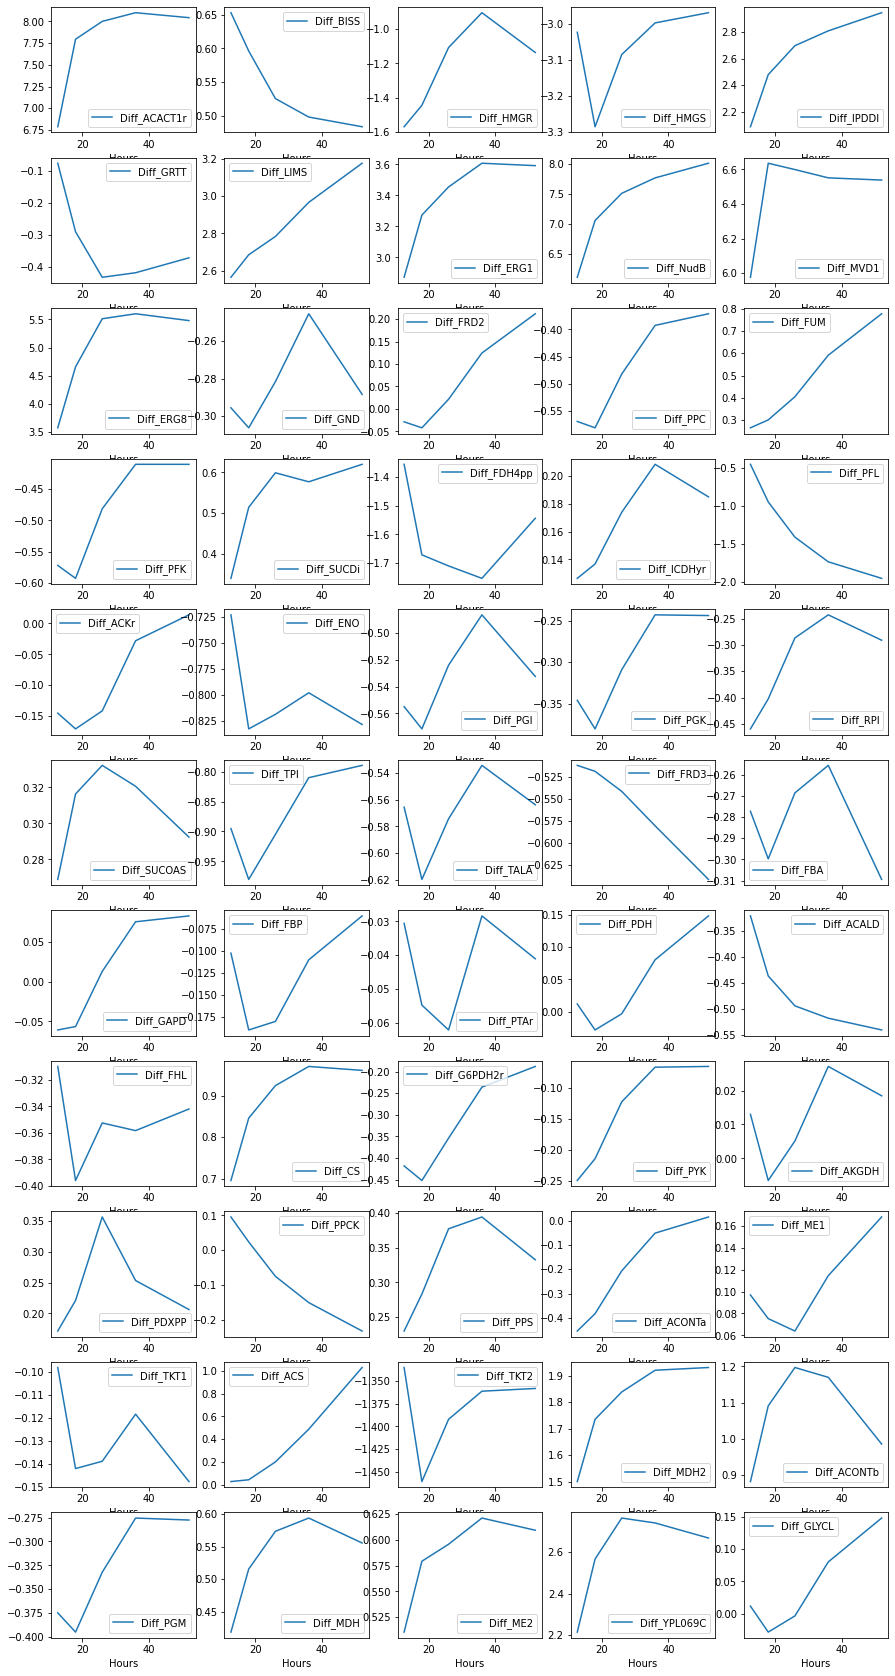

In [21]:
p1_list = list(df_I1_prot) # Get list of dataframe column names
p_length = len(p1_list)
print('Number of proteins =',p_length)

d_list = ['Unnamed: 0']

# Remove unwanted elements from the list
for element in d_list:
    p1_list.remove(element)

# Create a dataframe for each subplot    
dataframe_collection = {}
i=0
for protein in p1_list:
    df = pd.DataFrame(df_I1_prot['Unnamed: 0'])
    df.rename(columns = {'Unnamed: 0':'Hours'}, inplace = True)
    
    df3 = pd.DataFrame(df_I3_prot[protein])
    
    df4 = pd.DataFrame(df_WT_prot[protein])
    
    df5 = df3 - df4
    
    df['Diff_'+protein] = df5[protein].rolling(3).mean() # Smooth with moving average - changes y-axis
    dataframe_collection[i] = df
    
    i += 1
    
dataframe_collection[1] # An array of dataframes

# Plot subplots
nrow=11
ncol=5
fig, axes = plt.subplots(nrow, ncol)
count=0
for r in range(nrow): # nrow-1 since r starts with zero
    for c in range(ncol): # ncol-1 since c starts with zero
        if count == p_length-1:
            break
        dataframe_collection[count].rolling(3).mean().plot(ax=axes[r,c], figsize=(15,30),x='Hours')
        count+=1

### Plot the enzyme concentations of the isopentenol pathway

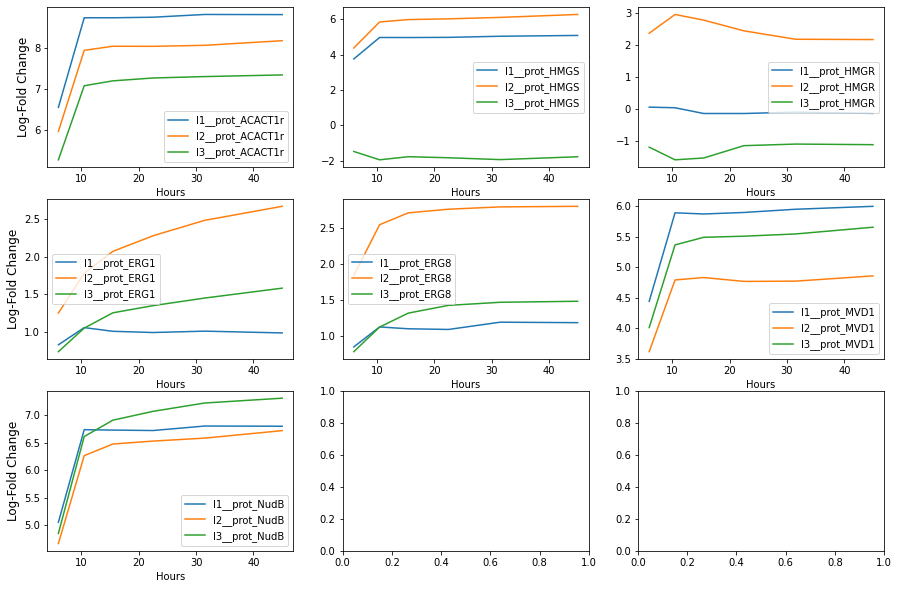

In [22]:
import matplotlib.pyplot as plt
import numpy as np

p1_list = ['ACACT1r','HMGS','HMGR','ERG1','ERG8','MVD1','NudB']
d_list = ['Unnamed: 0']

# Remove unwanted elements from the list
#for element in d_list:
#    p1_list.remove(element)

# Create a dataframe for each subplot   
dataframe_collection = {}
i=0
for protein in p1_list:
    df = pd.DataFrame(df_I1_prot['Unnamed: 0']).copy()
    df.rename(columns = {'Unnamed: 0':'Hours'}, inplace = True)
    
    df1 = pd.DataFrame(df_I1_prot[protein])
    df['I1__prot_'+protein] = df1[protein]
    
    df2 = pd.DataFrame(df_I2_prot[protein])
    df['I2__prot_'+protein] = df2[protein]
    
    df3 = pd.DataFrame(df_I3_prot[protein])
    df['I3__prot_'+protein] = df3[protein]
    
    #df4 = pd.DataFrame(df_WT_prot[protein])
    #df['WT__prot_'+protein] = df4[protein]
    
    dataframe_collection[i] = df
    i += 1

# Plot subplots
p1_length = len(p1_list)
nrow=3
ncol=3
fig, axes = plt.subplots(nrow, ncol)
axes[0][0].set_ylabel('Log-Fold Change',size = 12)
axes[1][0].set_ylabel('Log-Fold Change',size = 12)
axes[2][0].set_ylabel('Log-Fold Change',size = 12)
count=0
for r in range(nrow): # nrow-1 since r starts with zero
    for c in range(ncol): # ncol-1 since c starts with zero
        if count == p1_length:
            break
        dataframe_collection[count].rolling(4).mean().plot(ax=axes[r,c], figsize=(15,10),x='Hours')
        count+=1